# Installation and Imports


In [1]:
! pip install numpy matplotlib

  Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1.04 Exploring activation functions


## The Sigmoid function


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Text(0, 0.5, 'sigmoid(x)')

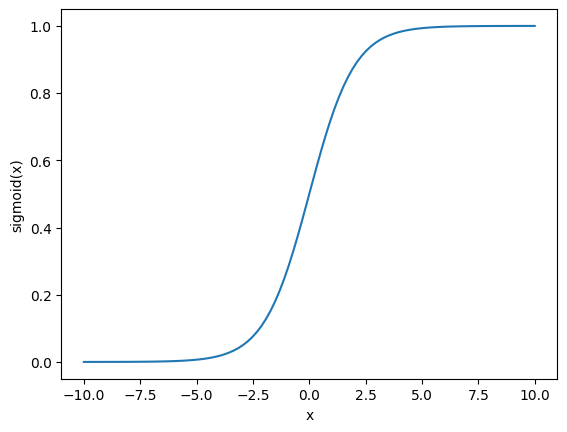

In [4]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")

## The tanh function


In [11]:
def tanh(x):
    numerator = 1 - np.pow(np.exp(-x), 2)
    denominator = 1 + np.pow(np.exp(-x), 2)
    return (numerator / denominator)

Text(0, 0.5, 'tanh(x)')

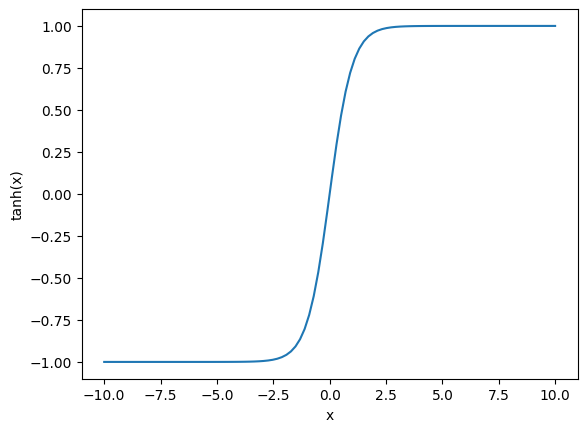

In [12]:
x = np.linspace(-10, 10, 100)
y = tanh(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("tanh(x)")

## The ReLU function


In [21]:
def ReLU(x):
    # if x > 0, return x
    # else, return 0
    # alternatively, we can use numpy's maximum function
    return np.maximum(0, x)

Text(0, 0.5, 'ReLU(x)')

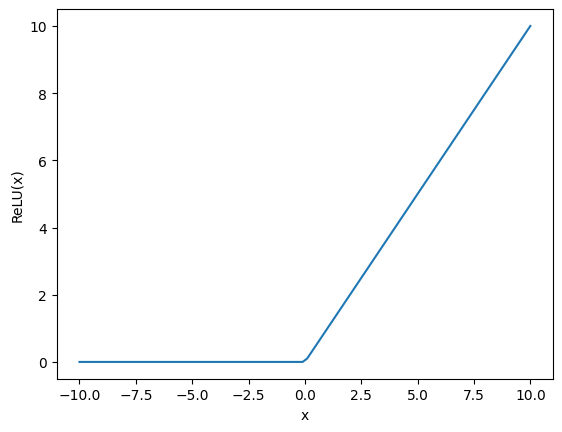

In [22]:
x = np.linspace(-10, 10, 100)
y = ReLU(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("ReLU(x)")

## The Leaky ReLU function


In [23]:
def leaky_relu(x, alpha=0.01):
    # if x > 0, return x
    # else, return alpha*x
    return np.maximum(alpha*x, x)

## The Exponential Linear Unit (ELU) function


In [54]:
def elu(x, alpha=1.0):
    # if x > 0, return x
    # else, return alpha*(exp(x) - 1)
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

Text(0, 0.5, 'elu(x)')

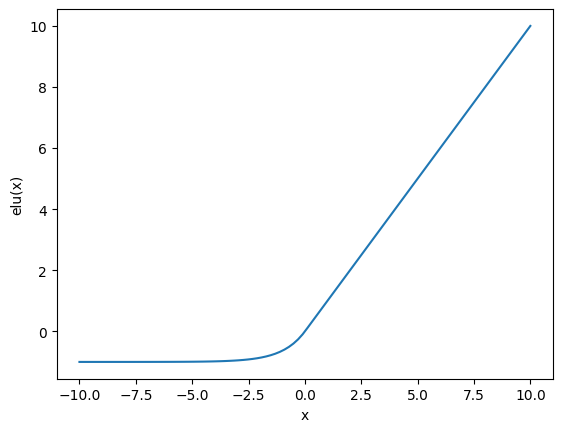

In [55]:
x = np.linspace(-10, 10, 100)
y = elu(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("elu(x)")

## The Swish function


In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def swish(x, beta=1):
    return 2 * x * sigmoid(beta * x)

Text(0, 0.5, 'swish(x)')

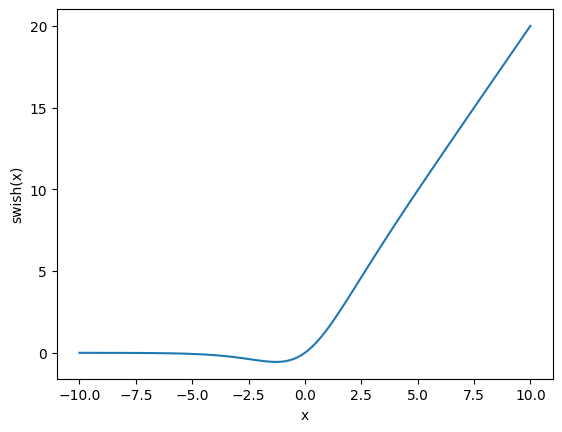

In [35]:
x = np.linspace(-10, 10, 100)
y = swish(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("swish(x)")

## Softmax function


In [38]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)

Text(0, 0.5, 'swish(x)')

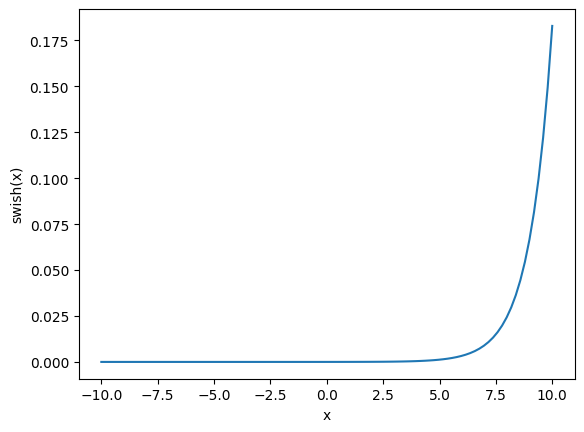

In [39]:
x = np.linspace(-10, 10, 100)
y = softmax(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("swish(x)")

# Forward propagation


In [ ]:
Wxh = np.random.randn(2, 2)
bh = np.random.randn(2)
Why = np.random.randn(2, 1)
by = np.random.randn(1)


def forward_prop(X):
    z1 = np.dot(X, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)
    return y_hat

# Backward propagation


In [ ]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)


def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

# 1.09 Building Neural Networks from Scratch


## Importing the necessary libraries


In [40]:
import numpy as np
import matplotlib.pyplot as plt

## XOR dataset


In [41]:
x = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

## Initializing the inputs, output, weights, and biases


In [42]:
num_input = 2
num_hidden = 5
num_output = 1

In [43]:
Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))

In [44]:
Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))

## Activation functions


In [45]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [46]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

## Forward and Backward propagation functions


In [47]:
def forward_prop(x, Wxh, Why):
    z1 = np.dot(x, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)

    return z1, a1, z2, y_hat

In [48]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

In [49]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)

    return J

## Learning rate and epochs


In [50]:
alpha = 0.01
num_iterations = 5000

## Training and testing the model


In [51]:
cost = []
for i in range(num_iterations):

    # perform forward propagation and predict output
    z1, a1, z2, y_hat = forward_prop(x, Wxh, Why)

    # perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)

    # update the weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy

    # compute cost
    c = cost_function(y, y_hat)

    # store the cost
    cost.append(c)

Text(0, 0.5, 'Cost')

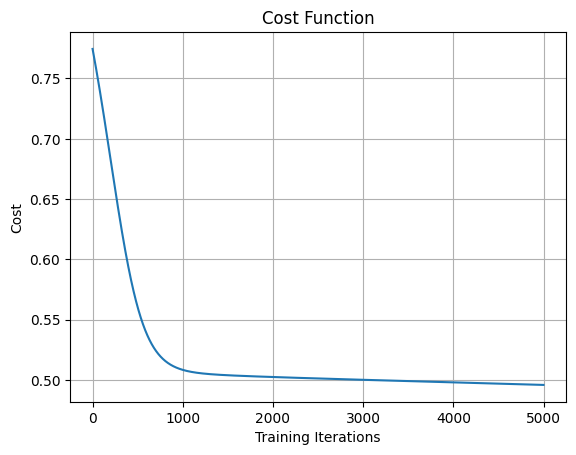

In [52]:
plt.grid()
plt.plot(range(num_iterations), cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')